In [199]:
#importing libraries
#for this project, only focusing on the dataset that includes needed categories
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [200]:
#create dataframe by reading csv using filepath
filepath = '/content/Twitch_Game_Data(1).csv'
#using rank as index since rank also counts the rows (makes it so we don't have uncessary columns)
df = pd.read_csv(filepath)

In [201]:
#dropping the value
df = df.dropna()

In [202]:
#dropping the values not needed for analysis
df.drop(['Peak_channels', 'Rank', 'Year', 'Month','Avg_viewer_ratio','Game'], axis=1, inplace=True)
df.head()

,Hours_watched,Hours_streamed,Peak_viewers,Streamers,Avg_viewers,Avg_channels
0,94377226,1362044,530270,129172,127021,1833
1,47832863,830105,372654,120849,64378,1117
2,45185893,433397,315083,44074,60815,583
3,39936159,235903,131357,36170,53749,317
4,16153057,1151578,71639,214054,21740,1549


In [203]:
#describing the dataset to see the statistics of the data
df.describe()

,Hours_watched,Hours_streamed,Peak_viewers,Streamers,Avg_viewers,Avg_channels
count,1.859900e+04,1.859900e+04,1.859900e+04,1.859900e+04,18599.000000,18599.000000
mean,5.571112e+06,1.797661e+05,6.228908e+04,2.184602e+04,7641.851928,246.114737
std,1.885640e+07,5.579033e+05,1.496783e+05,6.507313e+04,25872.791944,765.167291
min,8.981100e+04,1.900000e+01,4.410000e+02,0.000000e+00,120.000000,0.000000
25%,4.706680e+05,1.480650e+04,9.548500e+03,1.796500e+03,645.000000,20.000000
50%,9.983320e+05,3.864400e+04,2.273700e+04,5.006000e+03,1370.000000,52.000000
75%,2.805405e+06,1.031235e+05,5.281050e+04,1.327700e+04,3852.000000,141.000000
max,3.445520e+08,1.024570e+07,3.462517e+06,1.013324e+06,479209.000000,13789.000000


In [204]:
#creating bins and labels to categorize the hours watched
bins = [80000, 70000000, 139920000,209840000,279760000 , 349680000]
labels = [1, 2, 3, 4, 5]
#creating and hours watched bin column using the hours watched column
df['Hours_watched bins'] = pd.cut(df['Hours_watched'], bins=bins, labels=labels)
#initalizing ordinal encoder
encoder = OrdinalEncoder()
#ordinal encoder onto the hour watched level
df['Hour watched level'] = encoder.fit_transform(df[['Hours_watched bins']])
#display first few rows of updated dataframe
df.head()

,Hours_watched,Hours_streamed,Peak_viewers,Streamers,Avg_viewers,Avg_channels,Hours_watched bins,Hour watched level
0,94377226,1362044,530270,129172,127021,1833,2,1.0
1,47832863,830105,372654,120849,64378,1117,1,0.0
2,45185893,433397,315083,44074,60815,583,1,0.0
3,39936159,235903,131357,36170,53749,317,1,0.0
4,16153057,1151578,71639,214054,21740,1549,1,0.0


In [205]:
df.describe()

,Hours_watched,Hours_streamed,Peak_viewers,Streamers,Avg_viewers,Avg_channels,Hour watched level
count,1.859900e+04,1.859900e+04,1.859900e+04,1.859900e+04,18599.000000,18599.000000,18599.000000
mean,5.571112e+06,1.797661e+05,6.228908e+04,2.184602e+04,7641.851928,246.114737,0.023120
std,1.885640e+07,5.579033e+05,1.496783e+05,6.507313e+04,25872.791944,765.167291,0.201091
min,8.981100e+04,1.900000e+01,4.410000e+02,0.000000e+00,120.000000,0.000000,0.000000
25%,4.706680e+05,1.480650e+04,9.548500e+03,1.796500e+03,645.000000,20.000000,0.000000
50%,9.983320e+05,3.864400e+04,2.273700e+04,5.006000e+03,1370.000000,52.000000,0.000000
75%,2.805405e+06,1.031235e+05,5.281050e+04,1.327700e+04,3852.000000,141.000000,0.000000
max,3.445520e+08,1.024570e+07,3.462517e+06,1.013324e+06,479209.000000,13789.000000,4.000000


In [206]:
#dropping more unnecessary columns
df.drop(['Hours_watched bins','Hours_watched'], axis=1, inplace=True)
#display first few rows of updated dataframe
df.head()

,Hours_streamed,Peak_viewers,Streamers,Avg_viewers,Avg_channels,Hour watched level
0,1362044,530270,129172,127021,1833,1.0
1,830105,372654,120849,64378,1117,0.0
2,433397,315083,44074,60815,583,0.0
3,235903,131357,36170,53749,317,0.0
4,1151578,71639,214054,21740,1549,0.0


In [207]:
#X is our dependent variable which would be every column except hour watched level
#y is our independent variable which is hour watched level
X = df.drop('Hour watched level', axis=1)
y = df['Hour watched level']

In [208]:
#initializing the scaler for our dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#printing our x scaled
X_scaled

array([[ 2.119202  ,  3.12666155,  1.64935758,  4.61420467,  2.07396205],
       [ 1.16571538,  2.07360177,  1.52145189,  2.19294746,  1.13819381],
       [ 0.45462676,  1.68895996,  0.34159381,  2.05523152,  0.44028845],
       ...,
       [-0.28612193, -0.3472144 , -0.2485427 , -0.26630435, -0.28506263],
       [-0.27380405, -0.33927717, -0.31814319, -0.26669087, -0.27330018],
       [-0.25636866, -0.34734802, -0.23349768, -0.26688413, -0.25500304]])

In [209]:
#initializing the train_test_split with 0.3 size onto training X and y and test X and y
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [210]:
#intializing the gaussian model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [211]:
#creating the report
report = classification_report(y_test, model_preds, zero_division=0)

In [212]:
#printing accuracy and classification report
preds = model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print("Accuracy:", accuracy)

print("\nClassification Report:\n", report)

Accuracy: 0.9761648745519713

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      5479
         1.0       0.37      1.00      0.54        77
         2.0       0.91      1.00      0.95        10
         3.0       0.77      1.00      0.87        10
         4.0       0.00      0.00      0.00         4

    accuracy                           0.98      5580
   macro avg       0.61      0.80      0.67      5580
weighted avg       0.99      0.98      0.98      5580



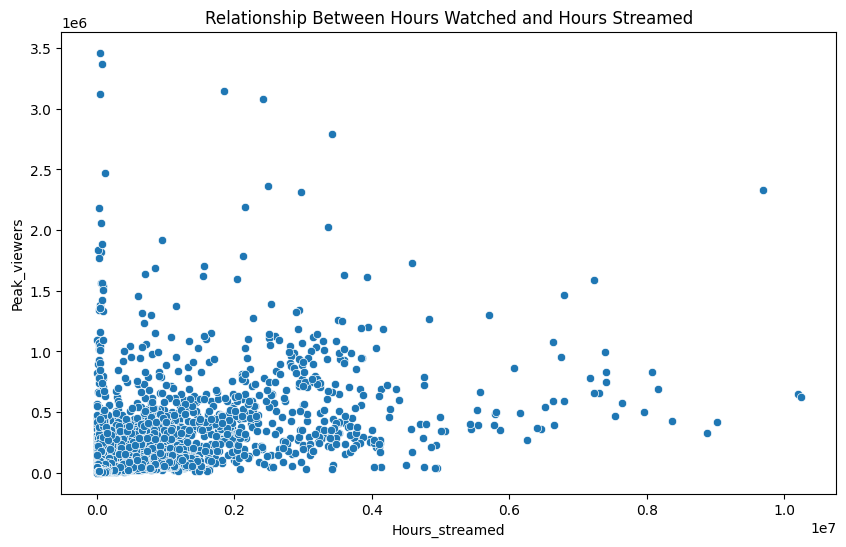

In [213]:
#scatter plot to visualize the relationship between hours watched and hours streamed
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Hours_streamed', y='Peak_viewers')
plt.title('Relationship Between Hours Watched and Hours Streamed')
plt.show()

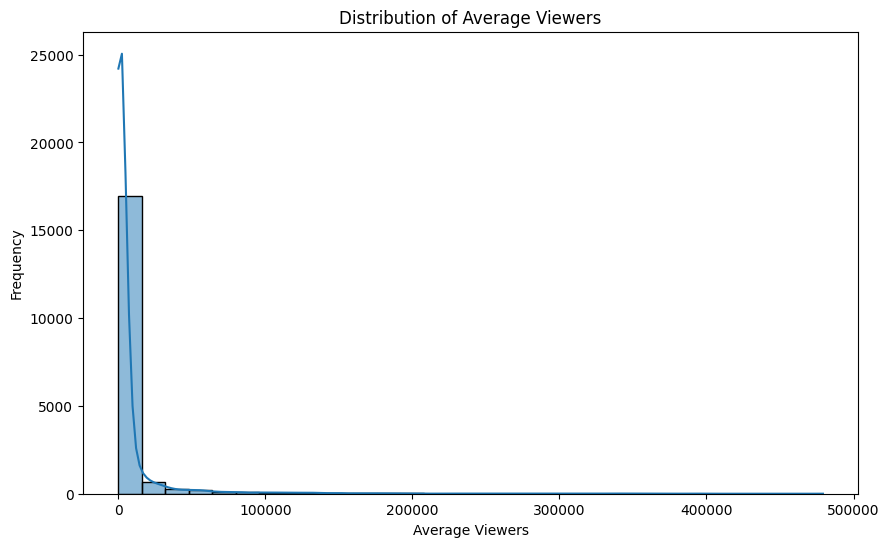

In [214]:
#histogram to show the distribution of average viewers
plt.figure(figsize=(10, 6))
sns.histplot(df['Avg_viewers'], bins=30, kde=True)
plt.title('Distribution of Average Viewers')
plt.xlabel('Average Viewers')
plt.ylabel('Frequency')
plt.show()

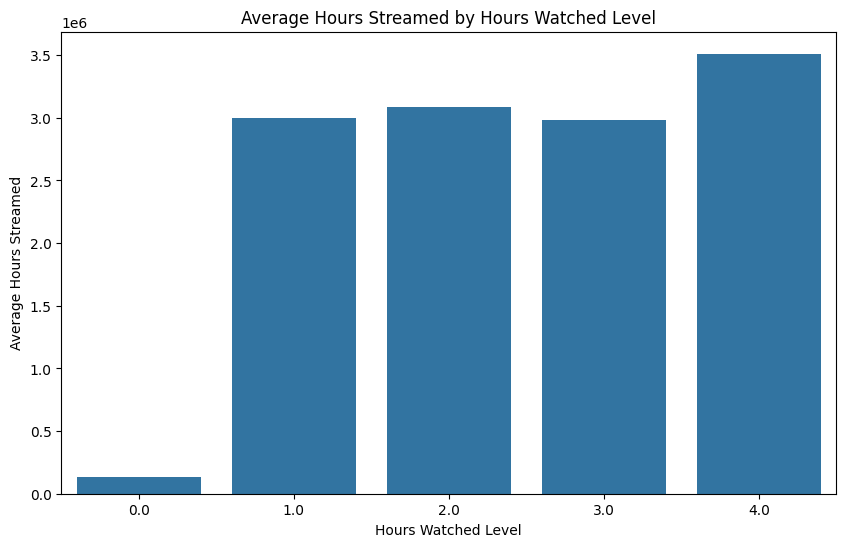

In [215]:
#creating a bar graph for average hours streamed by hours watched
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Hour watched level', y='Hours_streamed', errorbar=None)
plt.title('Average Hours Streamed by Hours Watched Level')
plt.xlabel('Hours Watched Level')
plt.ylabel('Average Hours Streamed')
plt.show()

In [216]:
#Below we are experimenting with various SVMs and different parameters
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())

In [217]:
#sigmoid svm report
svm_sig_pred = sig.predict(X_test)
print(classification_report(y_test, svm_sig_pred,zero_division=0))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      5479
         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        10
         3.0       0.00      0.00      0.00        10
         4.0       0.00      0.00      0.00         4

    accuracy                           0.98      5580
   macro avg       0.20      0.20      0.20      5580
weighted avg       0.96      0.98      0.97      5580



In [218]:
#rbf classification report
svm_rbf_pred = rbf.predict(X_test)
print(classification_report(y_test, svm_rbf_pred, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      5479
         1.0       0.88      0.78      0.83        77
         2.0       1.00      0.20      0.33        10
         3.0       1.00      0.40      0.57        10
         4.0       0.00      0.00      0.00         4

    accuracy                           0.99      5580
   macro avg       0.78      0.48      0.55      5580
weighted avg       0.99      0.99      0.99      5580



In [219]:
# linear svm classification report
svm_linear_pred = linear.predict(X_test)
print(classification_report(y_test, svm_linear_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5479
         1.0       0.95      0.95      0.95        77
         2.0       0.89      0.80      0.84        10
         3.0       0.75      0.90      0.82        10
         4.0       1.00      0.50      0.67         4

    accuracy                           1.00      5580
   macro avg       0.92      0.83      0.85      5580
weighted avg       1.00      1.00      1.00      5580



In [220]:
#knn classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())
y_pred_knn = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, zero_division=0))

Accuracy: 0.9958781362007169
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5479
         1.0       0.87      0.88      0.88        77
         2.0       0.83      0.50      0.62        10
         3.0       0.71      1.00      0.83        10
         4.0       0.00      0.00      0.00         4

    accuracy                           1.00      5580
   macro avg       0.68      0.68      0.67      5580
weighted avg       1.00      1.00      1.00      5580



In [221]:
#decision trees classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.9974910394265233
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5479
         1.0       0.95      0.94      0.94        77
         2.0       0.89      0.80      0.84        10
         3.0       0.69      0.90      0.78        10
         4.0       0.00      0.00      0.00         4

    accuracy                           1.00      5580
   macro avg       0.71      0.73      0.71      5580
weighted avg       1.00      1.00      1.00      5580



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [222]:
#random forest classifier
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
y_pred_rf = forest.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.9987455197132616

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5479
         1.0       0.96      0.99      0.97        77
         2.0       0.90      0.90      0.90        10
         3.0       0.83      1.00      0.91        10
         4.0       1.00      0.25      0.40         4

    accuracy                           1.00      5580
   macro avg       0.94      0.83      0.84      5580
weighted avg       1.00      1.00      1.00      5580

